<img align="right" style="max-width: 200px; height: auto" src="cfds_logo.png">

###  Lab 05 - "Supervised Machine Learning Naive Bayes and k-NN Classification"

Chartered Financial Data Scientist (CFDS), Spring Term 2020

In this fifth lab, we will build our first supervised machine learning "pipeline" using the following classification techniques, namely (1) the **Gaussian Naive-Bayes (GNB)** classifier and (2) the **k Nearest-Neighbors (kNN)** classifier you learned about in the lecture. Each of the two classification techniques correspond to one of the two different types of classifiers, namely **generative** and **discriminative** classifiers as distinguished in the following illustration: 

<img align="center" style="max-width: 600px; height: auto" src="supervisedlearning.png">

(Inspired by: 'Machine Learning - A Probabilistic Perspective', Kevin P. Murphy)

The *generative* **Naive-Bayes (NB)** classifier belongs to the family of simple "probabilistic classifiers" based on applying Bayes' theorem with a strong (naive) independence assumptions between the features. Naive Bayes has been studied extensively since the 1950s and remains an accessible (baseline) method for text categorization as well as other domains.


The *discriminative* **k Nearest-Neighbors (kNN)** classifier is a simple, easy to understand, versatile, but powerful machine learning algorithm. Until recently (prior to the advent of deep learning approaches) it was used in a variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition, e.g. in credit ratings, financial institutes used kNN to predict the solvency of customers. 

As always, pls. don't hesitate to ask all your questions either during the lab or send us an email (using our
fds.ai email addresses).

### Lab Objectives:

After today's lab you should be able to:

> 1. Understand how a Gaussian **Naive-Bayes (NB)** classifier can be trained and evaluated.
> 2. Understand how a **k Nearest-Neighbor (kNN)** classifier can be trained and evaluated.
> 3. Know how to Python's sklearn library to **train** and **evaluate** arbitrary classifiers.
> 4. Understand how to **evaluate** and **interpret** the classification results.

Before we start let's watch a motivational video:

In [ ]:
from IPython.display import YouTubeVideo
# OpenAI: "Solving Rubik's Cube with a Robot Hand"
# YouTubeVideo('x4O8pojMF0w', width=800, height=600)

### Setup of the Analysis Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. In this lab will use the `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` and the `Seaborn` library. Let's import the libraries by the execution of the statements below:

In [1]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
from scipy.stats import norm

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import sklearn naive.bayes and k-nearest neighbor classifier library
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Enable inline Jupyter notebook plotting:

In [2]:
%matplotlib inline

Set random seed of all our experiments:

In [3]:
random_seed = 42

## 1. Gaussian "Naive-Bayes" (NB) Classification

### 1.1. Dataset Download and Data Assessment

The **Iris Dataset** is a classic and straightforward dataset often used as a "Hello World" example in multi-class classification. This data set consists of measurements taken from three different types of iris flowers (referred to as **Classes**),  namely the Iris Setosa, the Iris Versicolour, and, the Iris Virginica) and their respective measured petal and sepal length (referred to as **Features**).

<img align="center" style="max-width: 700px; height: auto" src="iris_dataset.png">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

In total, the dataset consists of **150 samples** (50 samples taken per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details of the dataset can be obtained from the following puplication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Let's load the dataset and conduct a preliminary data assessment: 

In [4]:
iris = datasets.load_iris()

Print and inspect the names of the four features contained in the dataset:

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Determine and print the feature dimensionality of the dataset:

In [6]:
iris.data.shape

(150, 4)

Determine and print the class label dimensionality of the dataset:

In [7]:
iris.target.shape

(150,)

Print and inspect the names of the three classes contained in the dataset:

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 900px; height: auto" src="featurecollection.png">

Let's inspect the top ten feature rows of the Iris Dataset:

In [9]:
pd.DataFrame(iris.data, columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Let's also inspect the top ten class labels of the Iris Dataset:

In [10]:
pd.DataFrame(iris.target, columns=["class"]).head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Let's now conduct a more in depth data assessment. Therefore, we plot the feature distributions of the Iris dataset according to their respective class memberships as well as the features pairwise relationships.

Pls. note that we use Python's **Seaborn** library to create such a plot referred to as **Pairplot**. The Seaborn library is a powerful data visualization library based on the Matplotlib. It provides a great interface for drawing informative statstical graphics (https://seaborn.pydata.org). 

<Figure size 1000x1000 with 0 Axes>

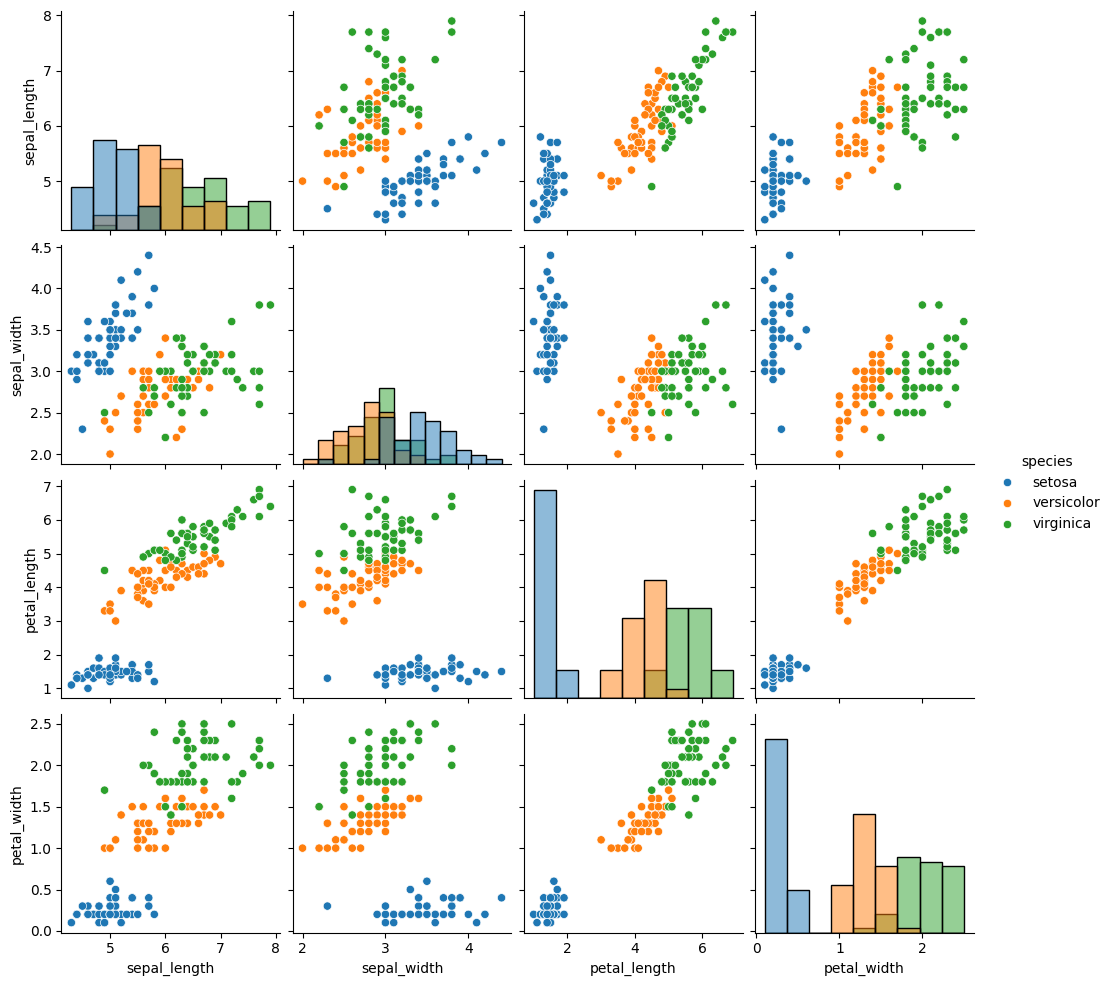

In [11]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

It can be observed from the created Pairplot, that most of the feature measurements that correspond to flower class "setosa" exhibit a nice **linear seperability** from the feature measurements of the remaining flower classes. In addition, the flower classes "versicolor" and "virginica" exhibit a commingled and **non-linear seperability** across all the measured feature distributions of the Iris Dataset.

### 1.2. Dataset Pre-Processing

To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice, to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Pls. note, the **evaluation set** will never be shown to the model as part of the training process.

<img align="center" style="max-width: 500px; height: auto" src="trainevaldataset.png">

We set the fraction of evaluation records to **30%** of the original dataset:

In [12]:
eval_fraction = 0.3

Randomly split the dataset into training set and evaluation set using sklearns `train_test_split` function:

In [13]:
# 70% training and 30% evaluation
x_train, x_eval, y_train, y_eval = train_test_split(iris.data, iris.target, test_size=eval_fraction, random_state=random_seed, stratify=None)

Evaluate the training set dimensionalities:

In [14]:
x_train.shape, y_train.shape

((105, 4), (105,))

Evaluate the evaluation set dimensionalities:

In [15]:
x_eval.shape, y_eval.shape

((45, 4), (45,))

### 1.3. Gaussian Naive-Bayes (NB) Classification

One popular (and remarkably simple) algorithm is the **Naive Bayes Classifier**. Note, that one natural way to adress a given classification task is via the probabilistic question: **"What is the most likely class $c^{*}$ considering all the available information $x$?"** Formally, we wish to output a conditional probability $P(c|x)$ for each class $c$ given distinct observations of $x$. Once we obtained such the conditional probability for each class we select the class $c^{*}$ corresponding to the highest $P(c|x)$ as expressed by:

$$c^{*} = \arg \max_{c} P(c|x)$$

That would require that we need to be prepared to estimate the probability distribution $P(c | \mathbf{x})$ for every possible value of $\mathbf{x} = \{x_1, x_2, ..., x_n\}$. 

**Excursion:** Imagine a document classification system that, depending on the occurance of a particular set of words in a document, predicts the class of the document. For example, if a the words **"recipe"**, **"pumpkin"**, **"cuisine"**, **"pancakes"**, etc. appear in the document, the classifier predicts a high probability of the document beeing a cookbook. Let's assume that the feature $x_{pancake} = 1$ might signify that the word **"pancakes"** appears in a given document and $x_{pancake} = 0$ would signify that it does not. If we had **30** such binary **"word-appearence" features**, that would mean that we need to be prepared to calculate the probability $P(c | \mathbf{x})$ of any of $2^{30}$ (over 1 billion) possible values of the input vector $\mathbf{x}= \{x_1, x_2, ..., x_{30}\}$:

$$\mathbf{x^{1}}= \{x_1=1, x_2=0, x_3=0, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$\mathbf{x^{2}}= \{x_1=1, x_2=1, x_3=0, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$\mathbf{x^{3}}= \{x_1=1, x_2=1, x_3=1, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$...$$
$$...$$
$$\mathbf{x^{2^{30}-1}}= \{x_1=1, x_2=1, x_3=1, x_4=1, x_5=1, x_6=1, ..., x_{29}=0, x_{30}=1\}$$
$$\mathbf{x^{2^{30}}}= \{x_1=1, x_2=1, x_3=1, x_4=1, x_5=1, x_6=1, ..., x_{29}=1, x_{30}=1\}$$

Moreover, where is the learning? If we need to see every single possible example in order to predict the corresponding label then we're not really learning a pattern but just memorizing the dataset. One solution to this challenge is the so-called **Bayes' theorem** (alternatively Bayes' law or Bayes' rule) that you learned about in the lecture. A common scenario for applying the Bayes' theorem formula is when you want to know the probability of something “unobservable” (e.g., the class $c$ of a document) given an “observed” event (e.g., the distinct words $x$ contained in the document). Such a probability is usually referred to as **posterior probability** mathematically denoted by $P(c|x)$.

The the Bayes' theorem formula provides an elegant way of calculating such posterior probabilities $P(c|x)$ without the need of observing every single possible configuration of $\mathbf{x} = \{x_1, x_2, ..., x_n\}$. Let's briefly revisit the formula of the Bayes' theorem below:

<img align="center" style="max-width: 400px; height: auto" src="bayestheorem.png">

In the formula of the **Bayes' theorem** above,

>- $P(c|x)$ denotes the **posterior** probability of class $c$ given a set of features $x$ denoted by $x_1, x_2, ..., x_n$.
>- $P(c)$ denotes the **prior** probability of observing class $c$.
>- $P(x|c)$ denotes the **likelihood** which is the probability of a feature $x$ given class $c$.
>- $P(x)$ denotes the **evidence** which is the general probability of observing feature $x$.

#### 1.3.1. Calculation of the prior probabilities $P(c)$ of each class

Let's build an intuition of the Bayes' theorem by first calculating the prior probability $P(c)$ of each class iris flower contained in the dataset. Therefore, we first obtain the number of occurance of each class in the extracted training data:

In [16]:
# determine counts of unique class labels
unique, counts = np.unique(y_train, return_counts=True)

# concatenate counts and class labels in a python dictionary
class_counts = dict(zip(unique, counts))

# print obtained dictionary
print(class_counts)

{np.int64(0): np.int64(31), np.int64(1): np.int64(37), np.int64(2): np.int64(37)}


Let's convert the obtained counts into probabilites. Therefore, we divide the class counts by the overall number of observations contained in the extracted training data:

In [17]:
# divide counts by the number of observations available in the training data
prior_probabilities = counts / np.sum(counts)

# print obtained probabilites
print(prior_probabilities)

[0.2952381  0.35238095 0.35238095]


Let's plot the obtained prior probabilites $P(c)$ accordingly:

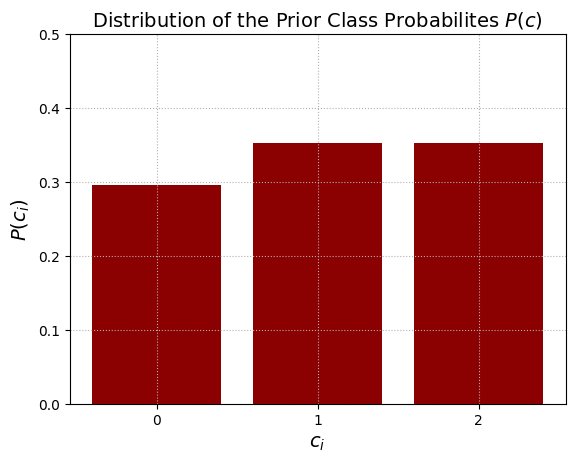

In [18]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.bar(x=np.unique(iris.target), height=prior_probabilities, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$c_{i}$", fontsize=14)
ax.set_ylabel("$P(c_{i})$", fontsize=14)

# set x-axis ticks
ax.set_xticks(np.unique(iris.target))

# set y-axis range
ax.set_ylim([0.0, 0.5])

# add plot title
ax.set_title('Distribution of the Prior Class Probabilites $P(c)$', fontsize=14);

#### 1.3.2. Calculation of the evidence $P(x)$ of each feature

Let's now calculate the general probability of observing a particular observation $𝑥$ which from a Bayes' theorem perspective denotes the evidence $P(\mathbf{x})$ of an observation $x=\{x_1, x_2, ..., x_n\}$. We assume that the first feature $x_{1}$ represents the "sepal length" observations of the Iris Dataset, the second feature $x_{2}$ = "sepal width", $x_{3}$ = "petal length", and $x_{4}$ = "petal width". 

In order to calculate the evidence $P(x)$ of a particular observation, e.g, $x=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$ the Bayes' theorem in general utilizes the following two tricks:

**Trick 1: "Conditional Independence"** 

Using the **"Chain Rule of Probabilities"**, we can express the evidence term $P( \mathbf{x} )$ as:

$$P( \mathbf{x}) = P(\{x_1, x_2, ..., x_n\}) = P(x_1) \cdot P(x_2 | x_1) \cdot P(x_3 | x_1, x_2) \cdot P(x_4 | x_1, x_2, x_3) \cdot ... \cdot P( x_n | x_1, ..., x_{n-1}) = \prod^n_i P(x_i | x_{1:i-1})$$

By itself, this expression doesn't get us any further. We still need, even in a case of $d$ binary features, to estimate roughly $2^d$ parameters. The trick of the **naive** Bayes' theorem however is to assume that the distinct features $x_1, x_2, ..., x_n$ are **conditionally independent** from each other when observing a particular class $c$. Using this assumption we're in much better shape, as the evidence term $P(\mathbf{x})$ simplifies to: 

$$P( \mathbf{x}) = P(\{x_1, x_2, ..., x_n\}) = P(x_1) \cdot P(x_2) \cdot P(x_3) \cdot P(x_4) \cdot ... \cdot P( x_n ) = \prod^n_i P(x_i)$$

Estimating each evidence term $\prod^n_i P(x_i)$ amounts to estimating the distribution of each feature $x_i$ independently. As a result, the assumption of conditional independence reduced the complexity of our model (in terms of the number of parameters) from an exponentially growing dependence in the number of features to a linear growing dependence. Hence, we call it the **"naive"** Bayes' theorem, since it makes the naive assumption about feature independence, so we don't have to care about dependencies among them.

**Trick 2: "Law of Large Numbers"** 

During the lecture you learned that evidence distribution can be approximated by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. This simplification can be justified by the application of the **"Law of Large Numbers"** or **"Central Limit Theorem"** (you may want to have a look at further details of the theorem under: https://en.wikipedia.org/wiki/Central_limit_theorem). In general, the probability density of a Gaussian "Normal" distribution, as defined by the formula below. It is parametrized its **mean $\mu$** and corresponding **standard deviation $\sigma$**:

<img align="center" style="max-width: 500px; height: auto" src="evidencecalculation.png">

Using the **"Law of Large Numbers"** we will approximate the evidence probability density $P(x) \approx \mathcal{N}(x | \mu, \sigma)$ of each of each feature $x_i$ by a Gaussian. To achieve this we need to come up with a good estimate of the parameters $\mu$ and $\sigma$ that define a Gaussian (Normal) probability distribution.

But how can this be achieved in practice? Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the Iris Dataset. The following line of code determines a histogram of the true **sepal length** feature value distribution and plots it accordingly:

In [19]:
# determine a histogram of the "sepal length" feature value distribution
hist_probabilities, hist_edges = np.histogram(x_train[:, 0], bins=10, range=(0,10), density=True)

# print the histogram feature value probabilites
print(hist_probabilities)

# print the histogram edges
print(hist_edges)

[0.         0.         0.         0.         0.13333333 0.42857143
 0.33333333 0.1047619  0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's also plot the probability density accordingly:

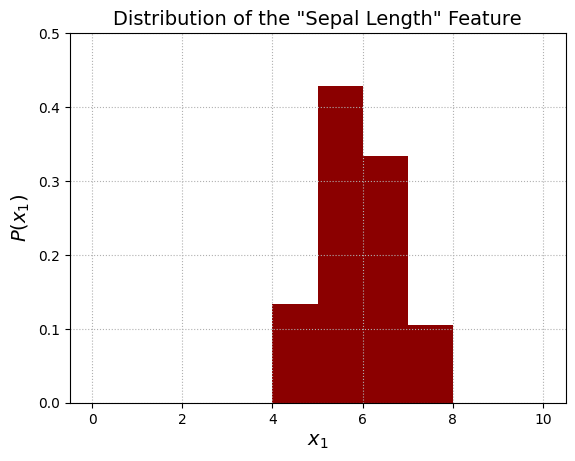

In [20]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=14)
ax.set_ylabel("$P(x_{1})$", fontsize=14)

ax.set_ylim([0.0, 0.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" Feature', fontsize=14);

How can we approximate the true probability density of the **sepal length** feature using a Gaussian distribution? Well, all we need to do is to calculate it's mean $\mu$ and standard deviation $\sigma$. Let's start by calculating the mean $\mu$ of the **sepal length** feature:

In [21]:
# calculate the mean of the sepal length observations
mean_sepal_length = np.mean(x_train[:, 0])

# print the obtained mean
print(mean_sepal_length)

5.8428571428571425


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature:

In [22]:
# calculate the standard deviation of the sepal length observations
std_sepal_length = np.std(x_train[:, 0])

# print the obtained standard deviation
print(std_sepal_length)

0.8293264212149339


We can now determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma)$ of the **sepal length** feature using the $\mu$ and $\sigma$ obtained above. Thereby, we will utilize the `pdf.norm` function available in the `scipy.stats` package:

In [23]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length, std_sepal_length)

# print obtained probabilities
print(hist_gauss_sepal_length)

[8.01301016e-12 1.86029102e-11 4.25649052e-11 9.59860307e-11
 2.13329039e-10 4.67280334e-10 1.00876641e-09 2.14629446e-09
 4.50063276e-09 9.30129531e-09 1.89451859e-08 3.80311880e-08
 7.52430678e-08 1.46716406e-07 2.81952822e-07 5.34022795e-07
 9.96847508e-07 1.83393206e-06 3.32524262e-06 5.94222397e-06
 1.04655071e-05 1.81659084e-05 3.10770328e-05 5.23971366e-05
 8.70685164e-05 1.42593693e-04 2.30157468e-04 3.66130078e-04
 5.74025688e-04 8.86977961e-04 1.35076535e-03 2.02736796e-03
 2.99896106e-03 4.37214602e-03 6.28208880e-03 8.89608792e-03
 1.24159411e-02 1.70783458e-02 2.31524815e-02 3.09339137e-02
 4.07340673e-02 5.28647601e-02 6.76176911e-02 8.52393228e-02
 1.05902260e-01 1.29674937e-01 1.56492110e-01 1.86129164e-01
 2.18183545e-01 2.52066505e-01 2.87007912e-01 3.22075865e-01
 3.56211614e-01 3.88278687e-01 4.17123455e-01 4.41642899e-01
 4.60854121e-01 4.73959553e-01 4.80401847e-01 4.79903192e-01
 4.72485180e-01 4.58467259e-01 4.38443911e-01 4.13242845e-01
 3.83868278e-01 3.514347

Let's now plot the approximate Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **sepal length** feature:

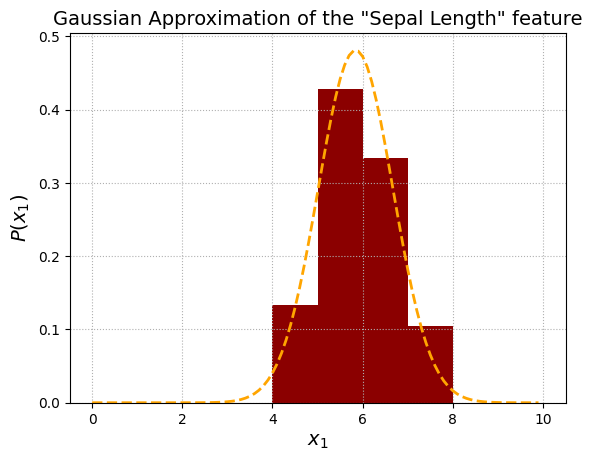

In [24]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$P(x_{1})$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Length" feature', fontsize=14);

Let's likewise approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **sepal width** feature and plot its distribution:

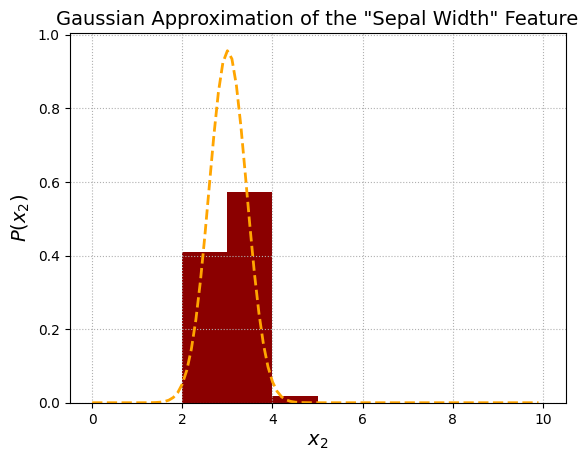

In [25]:
# determine mean and std of the "sepal width" feature
mean_sepal_width = np.mean(x_train[:, 1])
std_sepal_width = np.std(x_train[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width, std_sepal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal width" observations
ax.hist(x_train[:, 1], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{2}$", fontsize=14)
ax.set_ylabel("$P(x_{2})$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Width" Feature', fontsize=14);

And approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **petal length** feature and plot its distribution:

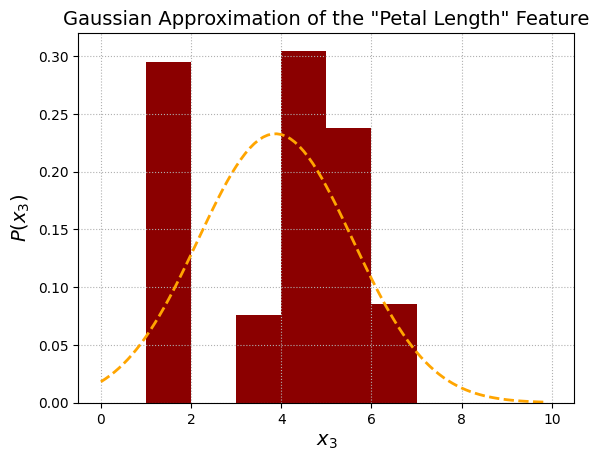

In [26]:
# determine mean and std of the "petal length" feature
mean_petal_length = np.mean(x_train[:, 2])
std_petal_length = np.std(x_train[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length, std_petal_length), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal length" observations
ax.hist(x_train[:, 2], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{3}$", fontsize=14)
ax.set_ylabel("$P(x_{3})$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Length" Feature', fontsize=14);

And approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **petal width** feature and plot its distribution:

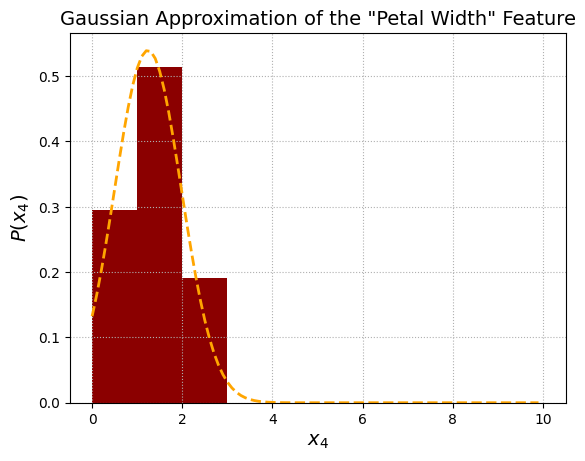

In [27]:
# determine mean and std of the "petal width" feature
mean_petal_width = np.mean(x_train[:, 3])
std_petal_width = np.std(x_train[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width, std_petal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal width" observations
ax.hist(x_train[:, 3], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{4}$", fontsize=14)
ax.set_ylabel("$P(x_{4})$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Width" Feature', fontsize=14);

#### 1.3.3. Calculation of the likelihood $P(x|c)$ of each feature

Let's now see how we can calculate the **likelihood** $P(\mathbf{x}|c)$ which is the probability density of a feature given a particular class $c$. We will again make use of the two tricks that we applied when calculating the **evidence** $P(x)$ probabilities. In order to calculate the likelihood $P(x|c)$ of a particular observation, e.g, $x=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5 | c="setosa"\}$ we will apply:

**Trick 1: "Conditional Independence"**, using the **"Chain Rule of Probabilities"**, we can express the likelihood term $P( \mathbf{x} | c)$ as:

$$P( \mathbf{x} | c) = P(\{x_1, x_2, ..., x_n\} | c) = P(x_1, c) \cdot P(x_2 | x_1, c) \cdot P(x_3 | x_1, x_2, c) \cdot P(x_4 | x_1, x_2, x_3, c) \cdot ... \cdot = \prod^n_i P(x_i | x_{1:i-1}, c)$$

We will again assume that the distinct features $x_1, x_2, ..., x_n$ are conditionally independent from each other when observing a particular class $c$. As a result the likelihood term $P( \mathbf{x} | c)$ simplifies to: 

$$P( \mathbf{x} | c) = P(\{x_1, x_2, ..., x_n\} | c) = P(x_1 | c) \cdot P(x_2 | c) \cdot P(x_3 | c) \cdot P(x_4 | c) \cdot ... \cdot P( x_n | c) = \prod^n_i P(x_i | c)$$

Estimating each evidence term $\prod^n_i P(x_i | c)$ amounts to estimating the distribution of each feature $x_i$ independently.

**Trick 2: "Law of Large Numbers"**, using this simplification we can can estimate $P(\mathbf{x}|c)$ by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. The **likelihood** probability density of a Gaussian "Normal" distribution, as defined by the formula below, is determined by its mean $\mu$, standard deviation $\sigma$ and it's corresponding class condition $c$:

<img align="center" style="max-width: 500px; height: auto" src="likelihoodcalculation.png">

Using the **"Law of Large Numbers"** we will approximate the likelihood probability density $P(x | c) \approx \mathcal{N}(x | \mu, \sigma, c)$ of each of each feature $x_i$ by a Gaussian. To achieve this we need to come up with a good estimate of the parameters $\mu$ and $\sigma$ that define a Gaussian (Normal) probability distribution.

But how can this be achieved in practice? Let's start by applying the class conditioning. This is usually done by filtering the dataset for each class $c$:

In [28]:
# collect all iris setosa measurements, class label = 0
x_train_setosa = x_train[y_train == 0]

# collect all iris versicolor measurements, class label = 1
x_train_versicolor = x_train[y_train == 1]

# collect all iris virginica measurements, class label = 2
x_train_virginica = x_train[y_train == 2]

Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the iris dataset given the class **setosa**. The following line of code determines a histogram of the true feature value distribution:

In [29]:
# determine a histogram of the "sepal length" feature value distribution given the class "setosa"
hist_setosa, bin_edges_setosa = np.histogram(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True)

# print the histogram feature value probabilites
print(hist_setosa)

# print the histogram edges
print(bin_edges_setosa)

[0.         0.         0.         0.         0.38709677 0.61290323
 0.         0.         0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's also plot the probability density accordingly:

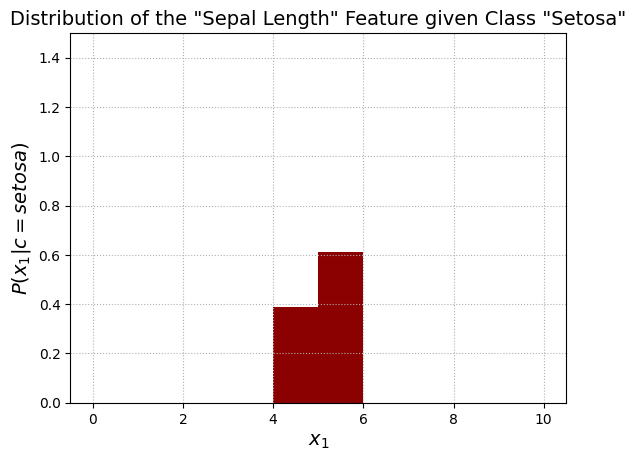

In [30]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=14)
ax.set_ylabel("$P(x_{1}|c=setosa)$", fontsize=14)
ax.set_ylim([0.0, 1.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" Feature given Class "Setosa"', fontsize=14);

We are again able to determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature given the class **setosa** using the $\mu$ and $\sigma$ obtained above as well as the `pdf.norm` function of the `scipy.stats` package.

Let's continue by calculating the mean $\mu$ of the **sepal length** feature given the class **setosa**:

In [31]:
# calculate the mean of the sepal length observations given class "setosa"
mean_sepal_length_setosa = np.mean(x_train_setosa[:, 0])

# print the obtained mean
print(mean_sepal_length_setosa)

4.964516129032259


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature given the class **setosa**:

In [32]:
# calculate the standard deviation of the sepal length observations given class "setosa"
std_sepal_length_setosa = np.std(x_train_setosa[:, 0])

# print the obtained standard deviation
print(std_sepal_length_setosa)

0.3346142575455468


In [33]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length_setosa = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length_setosa, std_sepal_length_setosa)

# print obtained probabilities
print(hist_gauss_sepal_length_setosa)

[1.89371035e-48 1.52597518e-46 1.12458830e-44 7.57969668e-43
 4.67220906e-41 2.63393397e-39 1.35799970e-37 6.40334116e-36
 2.76137750e-34 1.08907327e-32 3.92826330e-31 1.29585454e-29
 3.90952592e-28 1.07870853e-26 2.72205129e-25 6.28203961e-24
 1.32591966e-22 2.55944574e-21 4.51842230e-20 7.29524505e-19
 1.07722178e-17 1.45473049e-16 1.79668579e-15 2.02942917e-14
 2.09646608e-13 1.98067835e-12 1.71140283e-11 1.35239237e-10
 9.77384288e-10 6.46011381e-09 3.90505505e-08 2.15886918e-07
 1.09153500e-06 5.04732399e-06 2.13450351e-05 8.25552581e-05
 2.92014744e-04 9.44663198e-04 2.79486855e-03 7.56237054e-03
 1.87140030e-02 4.23533346e-02 8.76638824e-02 1.65945686e-01
 2.87291917e-01 4.54875999e-01 6.58680511e-01 8.72305839e-01
 1.05651318e+00 1.17028930e+00 1.18556051e+00 1.09841484e+00
 9.30724686e-01 7.21254023e-01 5.11172450e-01 3.31328508e-01
 1.96409435e-01 1.06482456e-01 5.27965996e-02 2.39412057e-02
 9.92883419e-03 3.76584702e-03 1.30628898e-03 4.14407904e-04
 1.20234464e-04 3.190377

Let's now plot the approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature given class **setosa**:

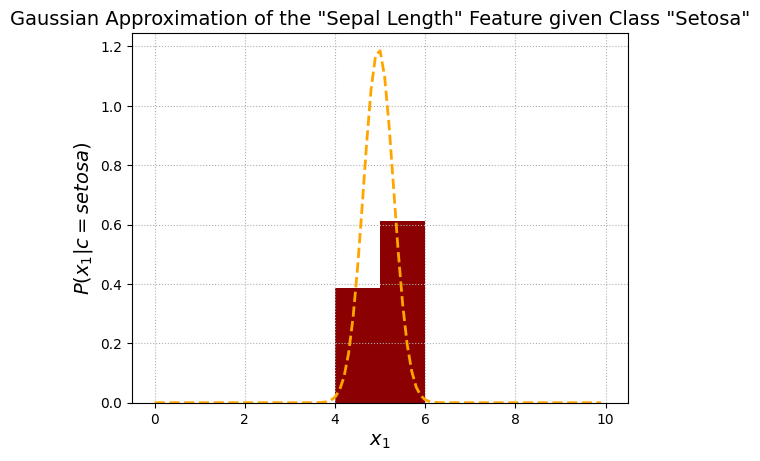

In [34]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length_setosa, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=14)
ax.set_ylabel("$P(x_{1}|c=setosa)$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Length" Feature given Class "Setosa"', fontsize=14);

Let's likewise approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **sepal width** feature given class **setosa** and plot its distribution:

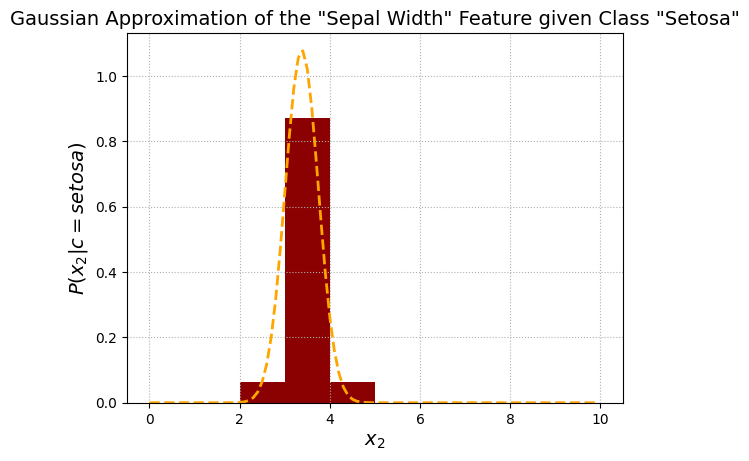

In [35]:
# determine mean and std of the "sepal width" feature given class setosa
mean_sepal_width_setosa = np.mean(x_train_setosa[:, 1])
std_sepal_width_setosa = np.std(x_train_setosa[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width_setosa, std_sepal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 1], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{2}$", fontsize=14)
ax.set_ylabel("$P(x_{2}|c=setosa)$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Width" Feature given Class "Setosa"', fontsize=14);

And approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **petal length** feature given class **setosa** and plot its distribution:

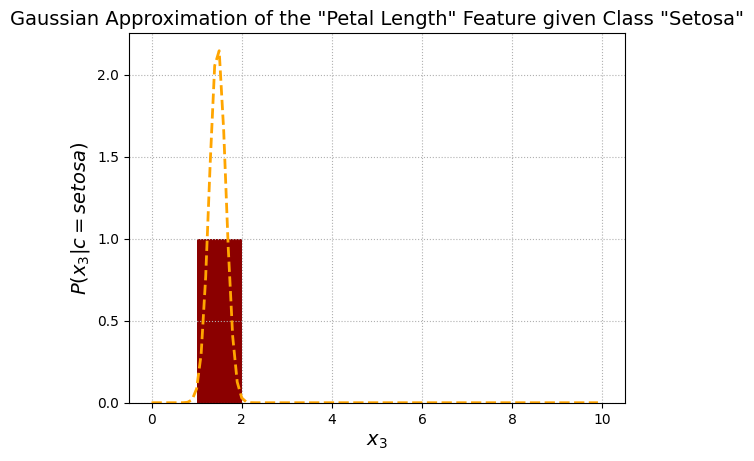

In [36]:
# determine mean and std of the "petal length" feature given class setosa
mean_petal_length_setosa = np.mean(x_train_setosa[:, 2])
std_petal_length_setosa = np.std(x_train_setosa[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length_setosa, std_petal_length_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 2], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{3}$", fontsize=14)
ax.set_ylabel("$P(x_{3}|c=setosa)$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Length" Feature given Class "Setosa"', fontsize=14);

And approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **petal width** feature given class **setosa** and plot its distribution:

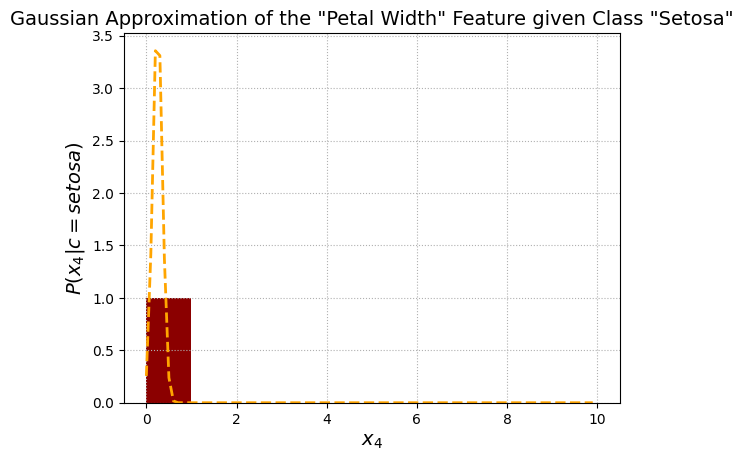

In [37]:
# determine mean and std of the "petal width" feature given class setosa
mean_petal_width_setosa = np.mean(x_train_setosa[:, 3])
std_petal_width_setosa = np.std(x_train_setosa[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width_setosa, std_petal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 3], bins=10, range=(0, 10), density=True, color='darkred')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{4}$", fontsize=14)
ax.set_ylabel("$P(x_{4}|c=setosa)$", fontsize=14)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Width" Feature given Class "Setosa"', fontsize=14);

#### 1.3.3. Calculation of the posterior probability $P(x|c)$ of unknown iris flower observations $x^{s}$  

Now we have determined all the distinct elements $P(c)$, $P(x)$ and $P(x|c)$ of the Bayes' theorem the determine the posterior probability $P(c=setosa|x)$ of a so far unseen "new" observations x of class **setosa**. Let's therefore determine if two so far unseen **iris flower** observations correspond to class **setosa**.

<img align="center" style="max-width: 500px; height: auto" src="iris_sample_1.png">

(Source: https://de.wikipedia.org/wiki/Schwertlilien)

The first **iris flower** observation $x^{s1}$ exhibits the following observed feature values: $x^{s1} = \{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}$:

In [38]:
# init features of first iris flower observation 
sepal_length_sample_1 = 5.8 
sepal_width_sample_1  = 3.5
petal_length_sample_1 = 1.5
petal_width_sample_1  = 0.25

Let's build an intuition of the distinct iris flower class distributions including the current iris flower observation:

<Figure size 1000x1000 with 0 Axes>

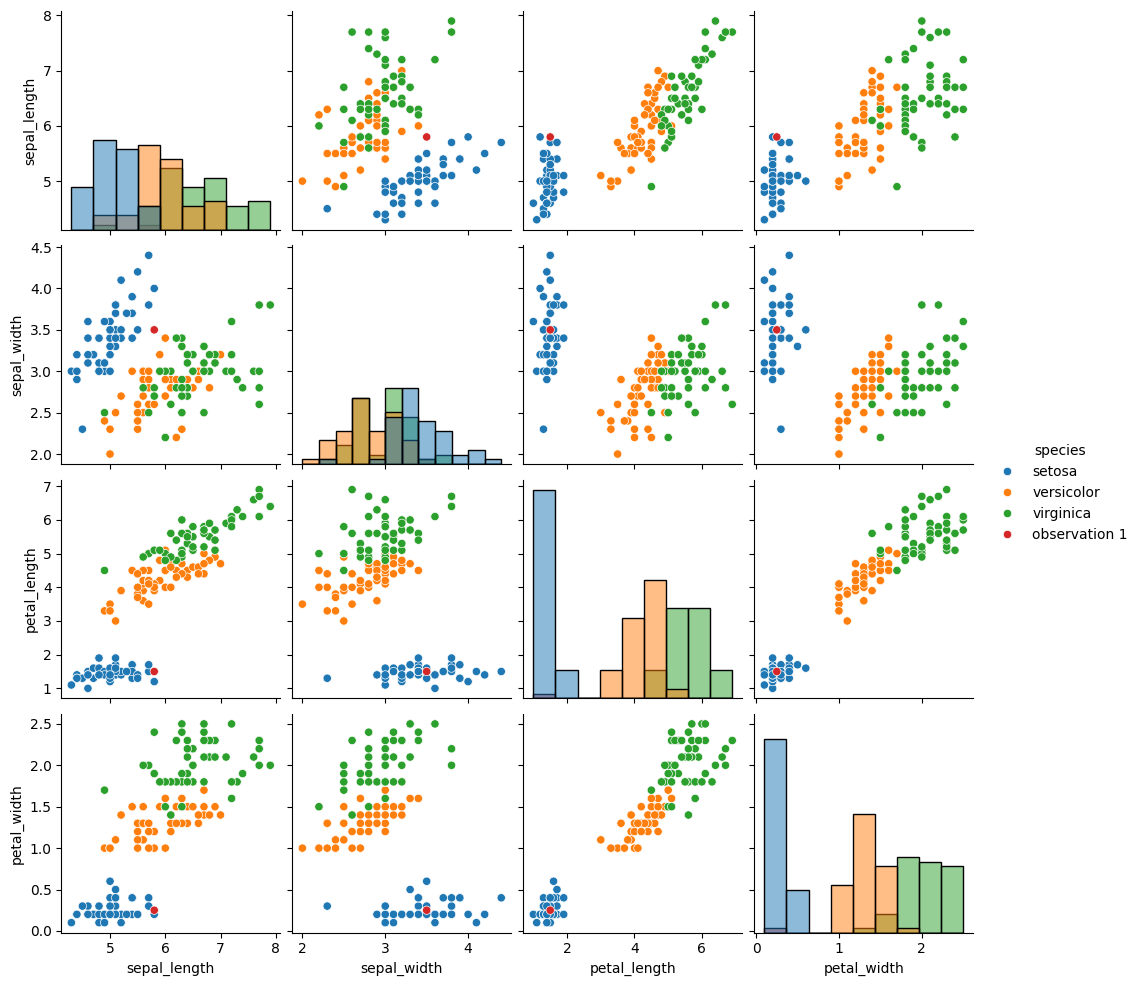

In [49]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# add observation to the iris dataset
#iris_plot = iris_plot.append(pd.DataFrame([[5.8, 3.5, 1.5, 0.25, "observation 1"]], columns=iris_plot.columns))
iris_plot = pd.concat([iris_plot,pd.DataFrame([[5.8, 3.5, 1.5, 0.25, "observation 1"]], columns=iris_plot.columns)], ignore_index=True)

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Let's determine the posterior probability $P(c=setosa|x^{s1})$:

In [50]:
# init the prior probability P(c='setosa')
prior = prior_probabilities[0]

# determine the likelihood probability P(x|c='setosa')
likelihood_setosa = norm.pdf(sepal_length_sample_1, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width_sample_1, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length_sample_1, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width_sample_1, mean_petal_width_setosa, std_petal_width_setosa)

# determine the evidence probability P(x)
evidence = norm.pdf(sepal_length_sample_1, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width_sample_1, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length_sample_1, mean_petal_length, std_petal_length) * norm.pdf(petal_width_sample_1, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior_setosa = (prior * likelihood_setosa) / evidence

# print the obtained posterior probability
print(posterior_setosa)

27.9971661170181


Ok, our observed iris flower results in a posterior probability $P(c=setosa|x^{s1})$ of beeing of class setosa of 27.99. For comparison purposes, let's also determine the posterior probability $P(c=versicolor|x^{s1})$ and see:

In [51]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='versicolor')
prior = prior_probabilities[1]

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length_sample_1, np.mean(x_train_versicolor[:, 0]), np.std(x_train_versicolor[:, 0])) * norm.pdf(sepal_width_sample_1, np.mean(x_train_versicolor[:, 1]), np.std(x_train_versicolor[:, 1])) * norm.pdf(petal_length_sample_1, np.mean(x_train_versicolor[:, 2]), np.std(x_train_versicolor[:, 2])) * norm.pdf(petal_width_sample_1, np.mean(x_train_versicolor[:, 3]), np.std(x_train_versicolor[:, 3]))

# determine the evidence probability P(x)
evidence = norm.pdf(sepal_length_sample_1, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width_sample_1, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length_sample_1, mean_petal_length, std_petal_length) * norm.pdf(petal_width_sample_1, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior_versicolor = (prior * likelihood_versicolor) / evidence

# print the obtained posterior probability
print(posterior_versicolor)

1.3121123522112815e-12


As well as the posterior probability $P(c=virginica|x^{s1})$:

In [52]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='virginica')
prior = prior_probabilities[2]

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length_sample_1, np.mean(x_train_virginica[:, 0]),  np.std(x_train_virginica[:, 0])) * norm.pdf(sepal_width_sample_1, np.mean(x_train_virginica[:, 1]), np.std(x_train_virginica[:, 1])) * norm.pdf(petal_length_sample_1, np.mean(x_train_virginica[:, 2]), np.std(x_train_virginica[:, 2])) * norm.pdf(petal_width_sample_1, np.mean(x_train_virginica[:, 3]), np.std(x_train_virginica[:, 3]))

# determine the evidence probability P(x)
evidence = norm.pdf(sepal_length_sample_1, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width_sample_1, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length_sample_1, mean_petal_length, std_petal_length) * norm.pdf(petal_width_sample_1, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior_virginica = (prior * likelihood_virginica) / evidence

# print the obtained posterior probability
print(posterior_virginica)

6.151041812726249e-20


Based on the obtained posterior probabilites $P(c|x)$ for the distinct iris flower classes $c = \{setosa, versicolor, virginica\}$ given the unknown observation $x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}$:

$$P(c=setosa|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{27.99}$$
$$P(c=versicolor|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{1.31e^{-12}}$$
$$P(c=virginica|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{6.15e^{-20}}$$

we can now apply our initial classification criteria, denoted by $\arg \max_{c} P(c|x)$ to savely determine the observations most likely class $c^{*} = setosa$.

Let's now have a look at a second **iris flower** observation and determine its most likely class $c^{*}$:

<img align="center" style="max-width: 500px; height: auto" src="iris_sample_2.png">


(Source: https://de.wikipedia.org/wiki/Schwertlilien)

The second **iris flower** observation $x^{s2}$ exhibits the following observed feature values: $x^{s2} = \{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$:

In [53]:
# init a second random feature observation 
sepal_length_sample_2 = 7.8
sepal_width_sample_2  = 2.3
petal_length_sample_2 = 6.4
petal_width_sample_2  = 2.5

Let's again build an intuition of the distinct iris flower class distributions including the current iris flower observation:

<Figure size 1000x1000 with 0 Axes>

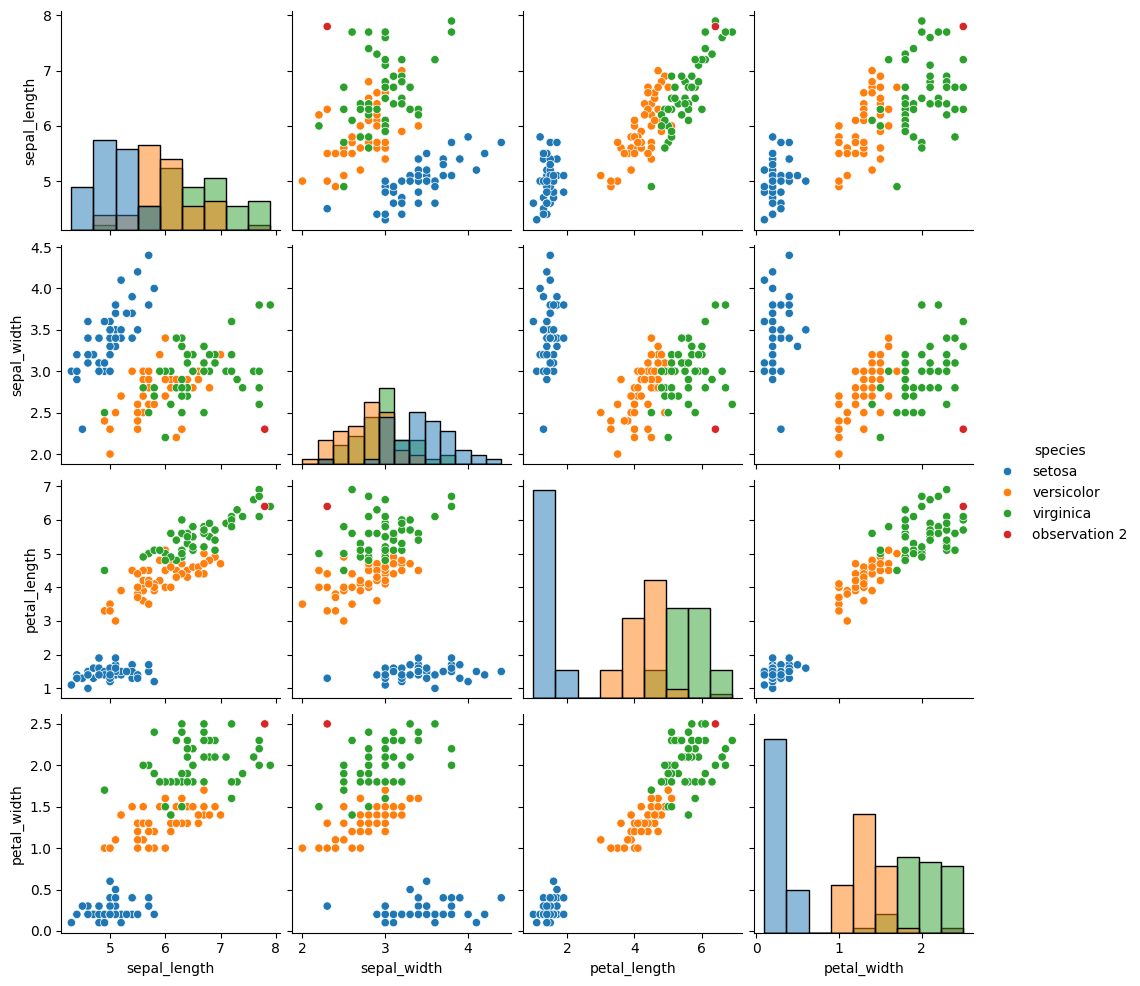

In [55]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# add observations to the iris dataset
iris_plot = pd.concat([iris_plot, pd.DataFrame([[7.8, 2.3, 6.4, 2.50, "observation 2"]], columns=iris_plot.columns)], ignore_index=True)

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Let's determine the posterior probability $P(c=setosa|x^{s2})$:

In [ ]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='setosa')
prior = prior_probabilities[0] 

# determine the likelihood probability P(x|c='setosa')
likelihood = norm.pdf(sepal_length_sample_2, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width_sample_2, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length_sample_2, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width_sample_2, mean_petal_width_setosa, std_petal_width_setosa)

# determine the evidence probability P(x)
evidence = norm.pdf(sepal_length_sample_2, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width_sample_2, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length_sample_2, mean_petal_length, std_petal_length) * norm.pdf(petal_width_sample_2, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior = (prior * likelihood) / evidence

# print the obtained posterior probability
print(posterior)

Ok, our observed iris flower results in a very low posterior probability $P(c=setosa|x^{s2})$ of beeing of class setosa of $5.02e^{-268}$. For comparison purposes, let's also determine the posterior probability $P(c=versicolor|x^{s2})$ and see:

In [ ]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='versicolor')
prior = prior_probabilities[1]

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length_sample_2, np.mean(x_train_versicolor[:, 0]), np.std(x_train_versicolor[:, 0])) * norm.pdf(sepal_width_sample_2, np.mean(x_train_versicolor[:, 1]), np.std(x_train_versicolor[:, 1])) * norm.pdf(petal_length_sample_2, np.mean(x_train_versicolor[:, 2]), np.std(x_train_versicolor[:, 2])) * norm.pdf(petal_width_sample_2, np.mean(x_train_versicolor[:, 3]), np.std(x_train_versicolor[:, 3]))

# determine the evidence probability P(x)
evidence = norm.pdf(sepal_length_sample_2, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width_sample_2, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length_sample_2, mean_petal_length, std_petal_length) * norm.pdf(petal_width_sample_2, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior_versicolor = (prior * likelihood_versicolor) / evidence

# print the obtained posterior probability
print(posterior_versicolor)

As well as the posterior probability $P(c=virginica|x^{s2})$:

In [ ]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='virginica')
prior = prior_probabilities[2]

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length_sample_2, np.mean(x_train_virginica[:, 0]), np.std(x_train_virginica[:, 0])) * norm.pdf(sepal_width_sample_2, np.mean(x_train_virginica[:, 1]), np.std(x_train_virginica[:, 1])) * norm.pdf(petal_length_sample_2, np.mean(x_train_virginica[:, 2]), np.std(x_train_virginica[:, 2])) * norm.pdf(petal_width_sample_2, np.mean(x_train_virginica[:, 3]), np.std(x_train_virginica[:, 3]))

# determine the evidence probability P(x)
evidence = norm.pdf(sepal_length_sample_2, mean_sepal_length, std_sepal_length) * norm.pdf(sepal_width_sample_2, mean_sepal_width, std_sepal_width) * norm.pdf(petal_length_sample_2, mean_petal_length, std_petal_length) * norm.pdf(petal_width_sample_2, mean_petal_width, std_petal_width)

# determine the posterior probability
posterior_virginica = (prior * likelihood_virginica) / evidence

# print the obtained posterior probability
print(posterior_virginica)

Based on the obtained posterior probabilites $P(c|x)$ for the distinct iris flower classes $c = \{setosa, versicolor, virginica\}$ given the unknown observation $x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$:

$$P(c=setosa|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{5.02e^{-268}}$$
$$P(c=versicolor|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{4.53e^{-12}}$$
$$P(c=virginica|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{4.06}$$

we can now apply our initial classification criteria, denoted by $\arg \max_{c} P(c|x)$ to savely determine the observations most likely class $c^{*} = virginica$.

#### 1.3.4. Training and utilization of a Gaussian Naive-Bayes Classifier using Python's Sklearn library

Luckily, there is a Python library named `Scikit-Learn` (https://scikit-learn.org) that provides a variety of machine learning algorithms that can be easily interfaced using the Python programming language. It also contains supervised classification algorithms such as the **Gaussian Naive-Bayes** classifier which we can use of the shelf.

Let's use `Scikit-Learn` and instantiate the **Gaussian Naive-Bayes** classifier:

In [ ]:
# init the Gaussian Naive Bayes classifier
gnb = GaussianNB(priors=None, var_smoothing=1e-09)

Train or fit the Gaussian Naive-Bayes classifier using the training dataset features and labels:

In [ ]:
# train the Gaussian Naive Bayes classifier
gnb.fit(x_train, y_train)

Utilize the trained model to predict the classes of the distinct observations contained in the evaluation dataset:

In [ ]:
y_pred = gnb.predict(x_eval)

Let's have a look at the class labels **predicted** by the Gaussian Naive-Bayes classifier on the evaluation dataset:

In [ ]:
y_pred

As well as the **true** class labels as contained in the evaluation dataset:

In [ ]:
y_eval

Determine the **prediction accuracy** of the trained model on the evaluation dataset:

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_eval, y_pred))

Determine number of **missclassified** data sampels in the evaluation dataset:

In [ ]:
print("Number of mislabeled points out of a total {} points: {}".format(x_eval.shape[0], np.sum(y_eval != y_pred)))

In the field of machine learning and in particular the field of statistical classification, a **confusion matrix**, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the number of instances that the classifier predicted per class, while each column represents the instances of the true or actual class:

<img align="center" style="max-width: 300px; height: auto" src="confusionmatrix.png">

(Source: https://en.wikipedia.org/wiki/Confusion_matrix)

Determine and plot the **confusion matrix** of the individual predictions:

In [ ]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Plot the **confusion matrix** of the individual predictions:

In [ ]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=iris.target_names, yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=14)
plt.ylabel('[predicted label]', fontsize=14)

# add plot title
plt.title('Confusion Matrix - Gaussian Naive Bayes', fontsize=14);

Let's now used the learned model and apply it to our unknown observations $x^{s1}$ and $x^{s2}$ to determine their corresponding class predictions $c^{*}$:  

In [ ]:
# determine class label prediction of the first unknown observation
class_prediction_sample_1 = gnb.predict([[5.8, 3.5, 1.5, 0.25]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_1[0]])

In [ ]:
# determine class label prediction of the second unknown observation
class_prediction_sample_2 = gnb.predict([[7.8, 2.3, 6.4, 2.50]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_2[0]])

### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train and evaluate the prediction accuracy of different train- vs. eval-data ratios.**

> Change the ratio of training data vs. evaluation data to 30%/70% (currently 70%/30%), fit your model and calculate the new classification accuracy. Subsequently, repeat the experiment a second time using a 10%/90% fraction of training data/evaluation data. What can be observed in both experiments in terms of classification accuracy? 

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**2. Calculate the true-positive as well as the false-positive rate of the Iris versicolor vs. virginica.**

> Calculate the true-positive rate as well as false-positive rate of (1) the experiment exhibiting a 30%/70% ratio of training data vs. evaluation data and (2) the experiment exhibiting a 10%/90% ratio of training data vs. evaluation data.

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

## 2. k Nearest-Neighbor (kNN) Classification

Now, let's have closer look into a non-parametric method used for supervised classification tasks, referred to as the the **k Nearest-Neighbors (kNN)** algorithm. As you learned during the in lecture k-NN classification, the output of the classifier is a class membership. 

Prior to running **k Nearest-Neighbor (kNN)** classification let's briefly revisit the distinct steps of the algorithm as discussed in the lecture:
<img align="center" style="max-width: 700px; height: auto" src="knn.png">

(Courtesy: Intro to AI & ML lecture, Prof. Dr. Borth, University of St. Gallen)

An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

### 2.1. Dataset Download and Data Assessment

Let's try the k Nearest-Neighbour algorithm using the delcious **Wine Dataset** is a classic and straightforward multi-class classification dataset. 

<img align="center" style="max-width: 600px; height: auto" src="wine_dataset.jpg">

(Source: https://www.empirewine.com)

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators (types). The dataset consists in total of **178 wines** as well as their corresponding **13 different measurements** taken for different constituents found in the three types of wine. Please, find below the list of the individual measurements (features):

>- `Alcohol`
>- `Malic acid`
>- `Ash`
>- `Alcalinity of ash`
>- `Magnesium`
>- `Total phenols`
>- `Flavanoids`
>- `Nonflavanoid phenols`
>- `Proanthocyanins`
>- `Color intensity`
>- `Hue`
>- `OD280/OD315 of diluted wines`
>- `CProline`

Further details on the dataset can be obtained from the following puplication: *Forina, M. et al, PARVUS - "An Extendible Package for Data Exploration, Classification and Correlation.", Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.*

Let's load the dataset and conduct a preliminary data assessment: 

In [ ]:
wine = datasets.load_wine()

Print and inspect feature names of the dataset:

In [ ]:
wine.feature_names

Print and inspect the class names of the dataset:

In [ ]:
wine.target_names

Print and inspect the top 10 feature rows of the dataset:

In [ ]:
pd.DataFrame(wine.data, columns=wine.feature_names).head(10)

Print and inspect the top 10 labels of the dataset:

In [ ]:
pd.DataFrame(wine.target).head(10)

Determine and print the feature dimensionality of the dataset:

In [ ]:
wine.data.shape

Determine and print the label dimensionality of the dataset:

In [ ]:
wine.target.shape

Plot the data distributions of the distinct features:

In [ ]:
# init the plot
plt.figure(figsize=(10, 10))

# prepare the dataset to be plotable using seaborn

# convert to Panda's DataFrame
wine_plot = pd.DataFrame(wine.data, columns=wine.feature_names)

# add class labels to the DataFrame
wine_plot['class'] = wine.target

# plot a pairplot of the distinct feature distributions
sns.pairplot(wine_plot, diag_kind='hist', hue='class');

### 2.2. Dataset Pre-Processing

#### 2.2.1. Feature Re-Scaling

Observing the features values of the **Wine Dataset** we will notice that their respective value ranges vary widely. This results in a major challenge for distance based machine learning algorithms such as the **k Nearest-Neighbor** classifier. The **k Nearest-Neighbour** classifier calculate the distance between two observations using a distance measure sich as the **Euclidean** or **Manhattan** distance.

If one of the features exhibits a wide range of values, the calculated distance will be governed by this particular feature. Therefore, the range of all features needs to be **re-scaled** or **normalized** to a value range beween in $[0,1]$ or $[-1,1]$ so that each feature contributes approximately proportionately to the final distance. 

One widley used method of feature re-scaling is referred to as **Min-Max Normalization** and is given by:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

Let's re-scale the distinct feature values of the **Wine Dataset** using **Min-Max Normalization** using the `MinMaxScaler` class of the `sklearn` library:

In [ ]:
# init the min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# min-max normalize the distinct feature values
wine_data_norm = scaler.fit_transform(wine.data)

Print and inspect the top 10 feature rows of the normalized dataset:

In [ ]:
pd.DataFrame(wine_data_norm, columns=wine.feature_names).head(10)

Ok, we can observe that all features values have been re-scaled. Let's also statistically validate this observation and determine if all feature values have been re-scaled to a value range between in $[0,1]$:

In [ ]:
pd.DataFrame(wine_data_norm, columns=wine.feature_names).describe()

Looks, great. All feature values are indeed in a range between $[0,1]$. Let's also visualize the re-scaled feature values and inspect their distributions:

In [ ]:
# init the plot
plt.figure(figsize=(10, 10))

# prepare the dataset to be plotable using seaborn

# convert to Panda's DataFrame
wine_plot = pd.DataFrame(wine_data_norm, columns=wine.feature_names)

# add class labels to the DataFrame
wine_plot['class'] = wine.target

# plot a pairplot of the distinct feature distributions
sns.pairplot(wine_plot, diag_kind='hist', hue='class');

Excellent, the characteristics of the distinct feature value distributions remained unchanged.

#### 2.2.2. Extraction of Training- and Evaluation-Dataset

To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice, to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Pls. note, the **evaluation set** will never be shown to the model as part of the training process.

<img align="center" style="max-width: 500px; height: auto" src="trainevaldataset.png">

We set the fraction of testing records to **30%** of the original dataset:

In [ ]:
eval_fraction = 0.3

Randomly split the **Wine Dataset** into training set and evaluation set using sklearns `train_test_split` function:

In [ ]:
# 70% training and 30% evaluation
X_train, X_eval, y_train, y_eval = train_test_split(wine_data_norm, wine.target, test_size=eval_fraction, random_state=random_seed, stratify=None)

Evaluate the training set dimensionality:

In [ ]:
X_train.shape, y_train.shape

Evaluate the evaluation set dimensionality:

In [ ]:
X_eval.shape, y_eval.shape

### 2.3. k Nearest-Neighbor (kNN) Classification

#### 2.3.1. Nearest Neighbors Classification, k=4

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [ ]:
k_nearest_neighbors = 4

Please, recall that we discussed two distinct distance distance measures in the lecture to calculate the distance between an observation $x$ and it's $k$-nearest-neighbors $x'_{j}$ in a $n$-dimensonal feature space:

**Manhattan distance ("L1-norm"):** $$ D(x, x')=\|\sum^k_{j=1}\sum^n_{i=1}(x_{i} - x'_{j,i})\|$$

**Euclidian distance ("L2-norm"):** $$ D(x, x')=\sqrt{\sum^k_{j=1}\sum^n_{i=1}(x_{i} - x'_{j,i})^2}$$

were the index $j$ denotes the number of $k$-nearest-neighbors and the index $i$ denotes the $i$-th feature of a single nearest neighbor $x_j$. Since, the 13 features of the Wine dataset consist of continuous features we will use the Euclidean distance as the distance metric in our kNN classification:

In [ ]:
distance_metric = 'euclidean'

Init the **kNN classifier** of Python's `Scikit-Learn` library of data science algorithms: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Train the k-NN classifier using the training dataset:

In [ ]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [ ]:
y_pred = knn.predict(X_eval)

Let's have a look at the predicted class labels:

In [ ]:
y_pred

As well as the true class labels:

In [ ]:
y_eval

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [ ]:
print("Accuracy, k=4: ", metrics.accuracy_score(y_eval, y_pred))

Determine and plot the **confusion matrix** of the individual predictions:

In [ ]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Visualize the **confusion matrix** of the individual predictions determined by the **k=4 Nearest-Neighbor** classifier:

In [ ]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=14)
plt.ylabel('[predicted label]', fontsize=14)

# add plot title
plt.title('Confusion Matrix - k-NN, k=4', fontsize=14);

Remember that as part of the lecture you learned about several measures to evaluate the quality of a retrieval system, namely **Precision**, **Recall** and **F1-Score**. Let's briefly revisit their definition and subsequently calculate those measures based on the confusion matrix above:

>- The **Precision**, denoted by Precision $=\frac{TP}{TP + FP}$, is the probability that a retrieved document is relevant.
>- The **Recall**, denoted by Recall $=\frac{TP}{TP + FN}$, is the probability that a relevant document is retrieved.
>- The **F1-Score**, denoted by F1-Score $= 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$, combines precision and recall is the harmonic mean of both measures.

In [ ]:
print(classification_report(y_eval, y_pred))

#### 2.3.2. Nearest Neighbors Classification, k=8

Set the number of neighbors `k` to be considered in the classification of each sample: 

In [ ]:
k_nearest_neighbors = 8

Init the **k-NN classifier** of Python's `sklearn` libary of data science algoritms: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Train the k-NN classifier using the training dataset:

In [ ]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [ ]:
y_pred = knn.predict(X_eval)

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [ ]:
print("Accuracy, k=8: ", metrics.accuracy_score(y_eval, y_pred))

Determine and plot the **confusion matrix** of the individual predictions:

In [ ]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Visualize the **confusion matrix** of the individual predictions determined by the **k=8 Nearest-Neighbor** classifier:

In [ ]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=14)
plt.ylabel('[predicted label]', fontsize=14)

# add plot title
plt.title('Confusion Matrix - k-NN, k=8', fontsize=14);

In [ ]:
print(classification_report(y_eval, y_pred))

#### 2.3.3. Finding the optimal k of the kNN classifier

Until now we have investigated the Euclidean distance based kNN classifer for two distinct values of $k=5$ and $k=8$. However the question remains can we locate a value for k that yield to an even higher classification accuracy? 

Let's therefore investigate the classification performance of a wider range of distinct $k$ values and in particular compare the corresponding classification accuracy. We will do so in the following by specifying a range of distinct $k$ values ranging from $k=1, ..., 25$:

In [ ]:
# try k=1 through k=25 to be evaluated
k_range = range(1, 25)

To run the kNN classification experiments for different values of $k$ we will define a python loop. The loop iterates over the range of distinct k's and conducts the model training (using the training data) and evaluation (using the evaluation data). The classification accuracy for each $k$ value will be collected and stored in a designated list of accuracy scores: 

In [ ]:
# init the distinct accuracy scores obtained on the evaluation data
eval_accuracy_scores = []

# iterate over the distinct k values
for k in k_range:
    
    # init the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # train the k-NN classifer on the training data
    knn.fit(X_train, y_train)
    
    # evaluate the k-NN classifier on the training data
    y_train_pred = knn.predict(X_train)
    
    # evaluate the k-NN classifier on the evaluation data
    y_eval_pred = knn.predict(X_eval)
    
    # determine classification accuracy
    accuracy = metrics.accuracy_score(y_eval, y_eval_pred)
    
    # collect the classification accuracy of the current k on the evaluation data
    eval_accuracy_scores.append(accuracy)

Visualizing the collected classification accuracy scores of the distinct $k$ values:

In [ ]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the classification accuracy of distinct k's
ax.plot(range(1, len(eval_accuracy_scores)+1), eval_accuracy_scores, color='darkred', marker='o')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("[$k$-Nearest-Neighbors]", fontsize=14)
ax.set_ylabel("[% classification accuracy]", fontsize=14)

# add plot title
ax.set_title('k-NN Classification Accuracy', fontsize=14);

Alright, we can nicely observe that a constant high classification accuracy on the held out evaluation dataset can be achieved in the intervall of $k=16, ..., 23$. This is probably the $k$ value that you may want to use for inferencing and rolling to model out to production.

### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train, evaluate and plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40. Collect and print the prediction accuracy of each model respectively and compare the results. Plot the prediction accuracy collected for each model above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis. What kind of behaviour in terms of prediction accuracy can be observed with increasing k?

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**2. Train, evaluate and plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models without re-scaling the individual feature values.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40. Collect and print the prediction accuracy of each model respectively and compare the results. Plot the prediction accuracy collected for each model above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis. What kind of behaviour in terms of prediction accuracy can be observed with increasing k? What do you observe when comparing the results of the non re-scaled with the results obtained for the scaled features?

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**3. Train, evaluate and plot the prediction accuracy of the k=1,...,40 Nearest Neighbor models using the "Manhattan" distance.**

> Write a Python loop that trains and evaluates the prediction accuracy of all k-Nearest Neighbor parametrizations ranging from k=1,...,40 using the "Manhattan" instead of the "Euclidian" distance metric. Collect and print the prediction accuracy of each model respectively and compare the results. Plot the prediction accuracy collected for each model above. The plot should display the distinct values of k at the x-axis and the corresponding model prediction accuracy on the y-axis. What kind of behaviour in terms of prediction accuracy can be observed with increasing k? What do you observe when comparing the results obtained for the "Manhattan" distance with the ones obtained for the "Euclidean" distance?

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

### Lab Summary:

In this lab, a step by step introduction into (1) **Gaussian Naive-Bayes (GNB)** and (2) **k Nearest-Neighbor (kNN)** classification is presented. The code and exercises presented in this lab may serves as a starting point for more complex and tailored programs.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g. on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script. Pls. note that to convert the notebook, you need to install Python's **nbconvert** library and its extensions:

In [ ]:
# installing the nbconvert library
!pip install nbconvert
!pip install jupyter_contrib_nbextensions

Let's now convert the Jupyter notebook into a plain Python script:

In [ ]:
!jupyter nbconvert --to script cfds_lab_05.ipynb